In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from urllib import request
from scipy.interpolate import interp1d
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import speclite.filters as sp
from speclite import filters
from scipy.ndimage import sum_labels, mean


from astropy.io import fits
from astropy import units as u
from astropy import constants as c
from astropy.wcs import WCS
from astropy.wcs.utils import proj_plane_pixel_scales

from ppxf.ppxf import ppxf, rebin
import ppxf.ppxf_util as util
from ppxf import sps_util as lib

import os
import sys
import glob

In [2]:
# Load spatial binning map IC3392_individual.fits 
# --------- file location (edit if needed) ----------
binning_path = Path("IC3392_SPATIAL_BINNING_maps_extended.fits")
print("Loading:", binning_path.resolve())
with fits.open(binning_path) as hdul:
    LOGMASS_SURFACE_DENSITY = hdul['LOGMASS_SURFACE_DENSITY'].data
    binning_hdr     = hdul['LOGMASS_SURFACE_DENSITY'].header
    hdul.close()

binning_hdr


Loading: /Users/Igniz/Desktop/ICRAR/data/IC3392/IC3392_SPATIAL_BINNING_maps_extended.fits


XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  437                                                  
NAXIS2  =                  438                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =      216.43244136583 / Pixel coordinate of reference point            
CRPIX2  =      219.93673592818 / Pixel coordinate of reference point            
CDELT1  = -5.5555555555556E-05 / [deg] Coordinate increment at reference point  
CDELT2  =  5.5555555555556E-05 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'             

In [3]:
# Load gas line map IC3392_gas_BIN_maps.fits 
gas_path = Path('IC3392_gas_BIN_maps_extended.fits')
print(f"Loading gas line map from {gas_path}")
with fits.open(gas_path) as hdul:
    LOGSFR_SURFACE_DENSITY = hdul['LOGSFR_SURFACE_DENSITY'].data
    gas_header = hdul['LOGSFR_SURFACE_DENSITY'].header
    hdul.close()

gas_header


Loading gas line map from IC3392_gas_BIN_maps_extended.fits


XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  437                                                  
NAXIS2  =                  438                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =      216.43244136583 / Pixel coordinate of reference point            
CRPIX2  =      219.93673592818 / Pixel coordinate of reference point            
CDELT1  = -5.5555555555556E-05 / [deg] Coordinate increment at reference point  
CDELT2  =  5.5555555555556E-05 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'             

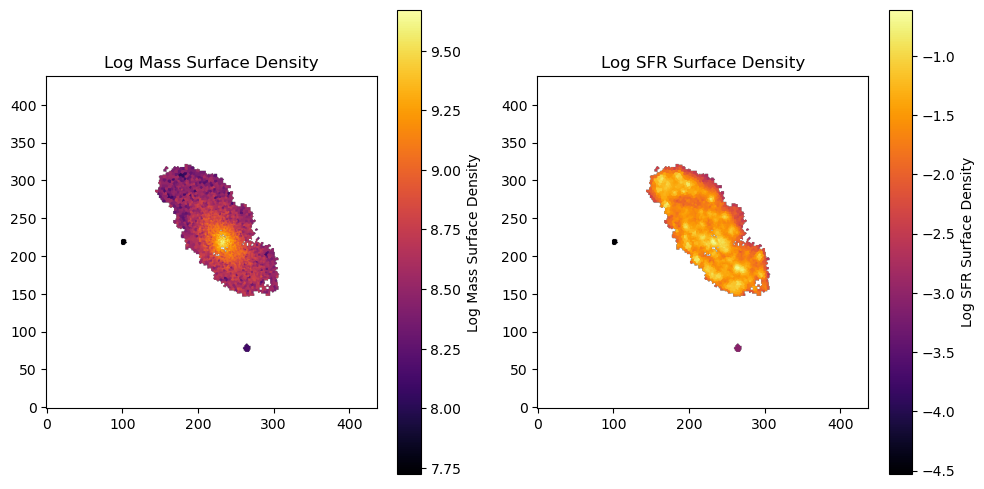

In [4]:
# Mask the valid spaxels
valid_spaxels = np.isfinite(LOGMASS_SURFACE_DENSITY) & np.isfinite(LOGSFR_SURFACE_DENSITY)
# Create a mask for the valid spaxels
LOGMASS_SURFACE_DENSITY_MASKED = np.where(valid_spaxels, LOGMASS_SURFACE_DENSITY, np.nan)
LOGSFR_SURFACE_DENSITY_MASKED = np.where(valid_spaxels, LOGSFR_SURFACE_DENSITY, np.nan)

# Plot the masked data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(LOGMASS_SURFACE_DENSITY_MASKED, origin='lower', cmap='inferno')
plt.colorbar(label='Log Mass Surface Density')
plt.title('Log Mass Surface Density')
plt.subplot(1, 2, 2)
plt.imshow(LOGSFR_SURFACE_DENSITY_MASKED, origin='lower', cmap='inferno')
plt.colorbar(label='Log SFR Surface Density')
plt.title('Log SFR Surface Density')
plt.tight_layout()
plt.show()

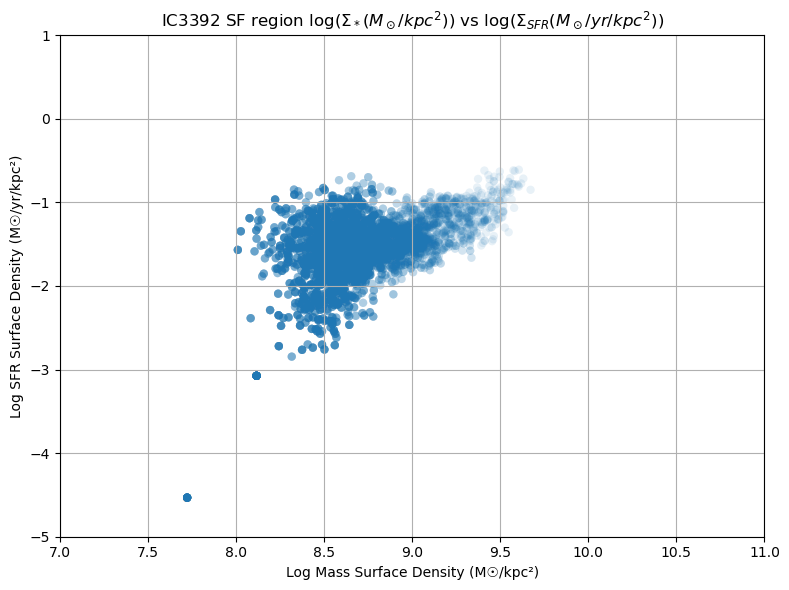

In [6]:
# Plot stellar mass surface density vs. SFR surface density
plt.figure(figsize=(8, 6))
plt.scatter(LOGMASS_SURFACE_DENSITY_MASKED, LOGSFR_SURFACE_DENSITY_MASKED, 
            alpha=0.1, edgecolor='none')
plt.xlabel('Log Mass Surface Density (M☉/kpc²)')
plt.ylabel('Log SFR Surface Density (M☉/yr/kpc²)')
plt.title(r'IC3392 SF region $\log(\Sigma_* (M_\odot/kpc^2))$ vs $\log(\Sigma_{SFR} (M_\odot/yr/kpc^2))$')
plt.xlim(7, 11)
plt.ylim(-5, 1)
plt.grid()   
plt.tight_layout()
plt.show()